In [2]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
x = np.arange(-6,6,0.05)
y = np.arange(-6,6,0.05)

xx, yy = np.meshgrid(x, y, sparse=True)

In [4]:
z = np.sin(xx**2 + yy**2)*np.cos(xx**2 - yy**2) / (xx**2 + yy**2)
z

array([[ 0.00352532,  0.00873031,  0.00520828, ..., -0.00261449,
         0.00520828,  0.00873031],
       [ 0.00873031,  0.01402314,  0.01051581, ...,  0.00267068,
         0.01051581,  0.01402314],
       [ 0.00520828,  0.01051581,  0.00694878, ..., -0.00099404,
         0.00694878,  0.01051581],
       ...,
       [-0.00261449,  0.00267068, -0.00099404, ..., -0.00907321,
        -0.00099404,  0.00267068],
       [ 0.00520828,  0.01051581,  0.00694878, ..., -0.00099404,
         0.00694878,  0.01051581],
       [ 0.00873031,  0.01402314,  0.01051581, ...,  0.00267068,
         0.01051581,  0.01402314]])

<a list of 117 text.Text objects>

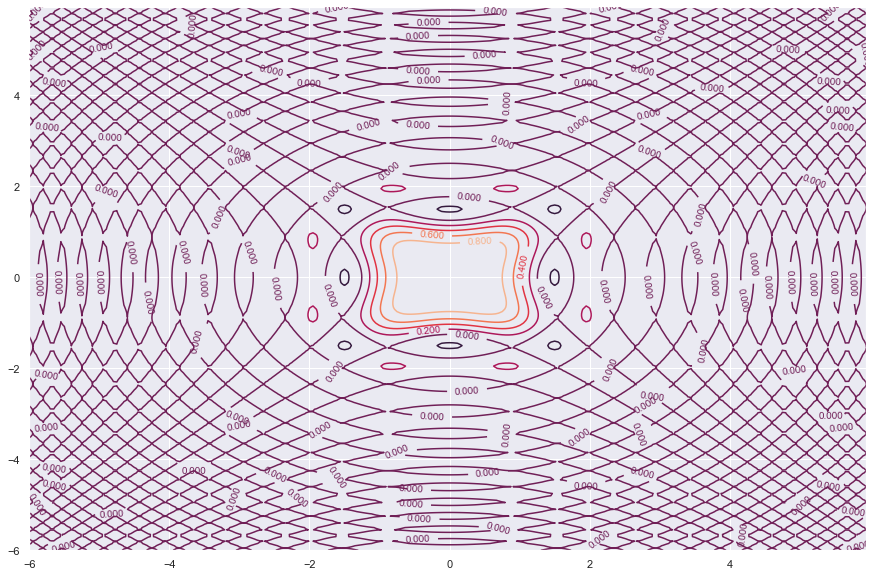

In [5]:
plt.figure(figsize = [15,10])
CS = plt.contour(x,y,z)
plt.clabel(CS, inline=1, fontsize=10)

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

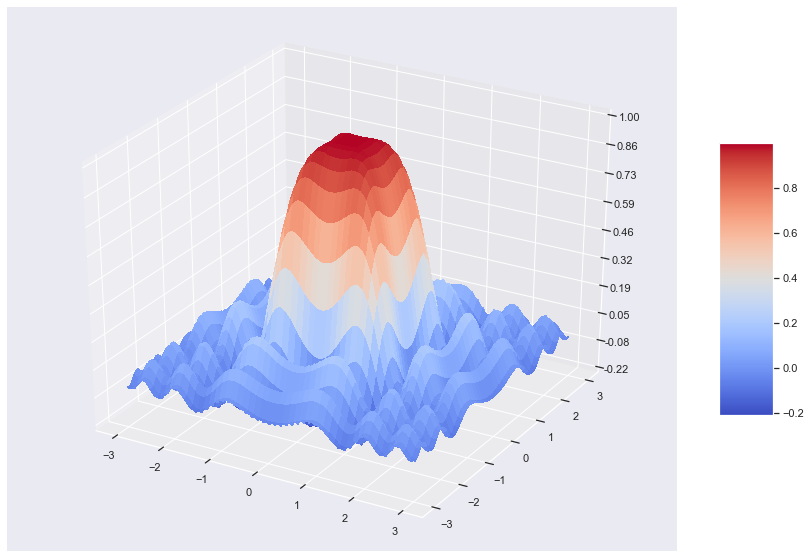

In [7]:
fig = plt.figure(figsize = [15,10])
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(-3, 3, 0.01)
y = np.arange(-3, 3, 0.01)

xx, yy = np.meshgrid(x, y) 


z = np.sin(xx**2 + yy**2)*np.cos(xx**2 - yy**2) / (xx**2 + yy**2)

# Plot the surface.
surf = ax.plot_surface(xx, yy, z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Equipotential Isosurfaces

In [8]:
qx=1
qy=1
qz=1

In [9]:
X=[2,2,0]
Y=[3,2,0]
Z=[2.5,3.5,0]

In [10]:
class Charge:
    
    def __init__(self, q, pos):
        self.q = q
        self.pos = pos
        
        
    def line(self, x,y,z):
        #create a vector from charge to observation point
        self.vector = [x-self.pos[0],y-self.pos[1],z-self.pos[2]]
        #norm of the vector
        self.norm = np.sqrt((self.vector[0])**2+(self.vector[1])**2+(self.vector[2]**2))
        
    
    def V_point_charge(self, x, y,z):
        #recall length
        self.line(x,y,z)
        
        if self.norm > 0:
            self.V = self.q/self.norm
            
        #if length is zero, set V equal to 0
        elif self.norm == 0:
            self.V = 0
            
        return self.V
    

In [11]:
eqch=[Charge(qx,X),Charge(qy,Y),Charge(qz,Z)] 
eqch

In [12]:
#Total potential at a point(x,y) due to charges
def V_total(x, y,z, charges):
    V = 0
    for C in charges:
        Vp = C.V_point_charge(x, y,z)
        V  = V+Vp
    return V

In [13]:
#Total potential at (1.7,1.8,1) due to charges 
V_total(x=1.7, y=1.8, z=1, charges = eqch)

2.0157893867873393

ValueError: operands could not be broadcast together with shapes (1200,) (600,600) 

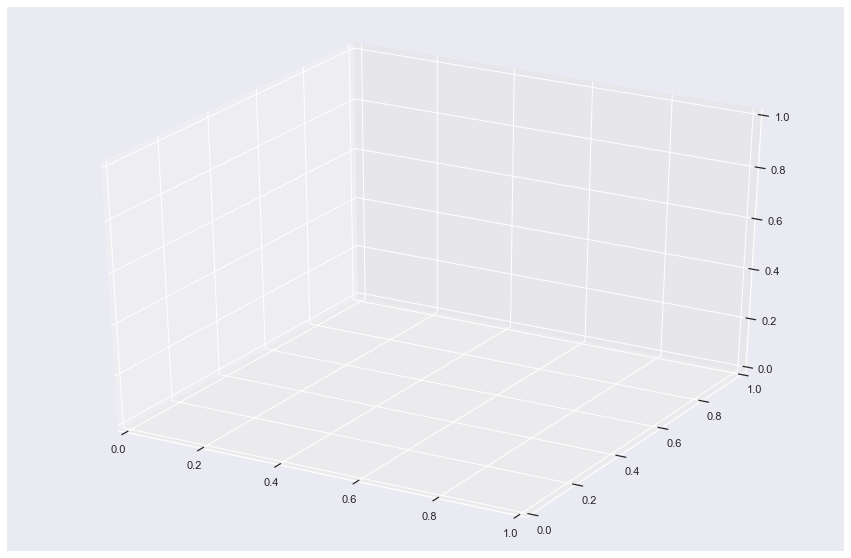

In [29]:
fig = plt.figure(figsize = [15,10])
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(-6, 6, 0.01)
y = np.arange(-6, 6, 0.01)

xx, yy = np.meshgrid(x, y) 


z = V_total(x,y,z,charges=eqch)

# Plot the surface.
surf = ax.plot_surface(xx, yy, z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [17]:
import plotly.graph_objects as go


fig= go.Figure(data=go.Isosurface(
    x = np.arange(-6, 6, 1),
    y = np.arange(-6, 6, 1),
    z = np.arange(-3,3,0.5),
    value=np.arange(-6,6,1),
    isomin=0,
    isomax=10,
))

fig.show()